# clustering challenge

<h1>data preprocessing<br>
cluster number<br>
build the model</h1>

### Dependancies 

In [1]:
import warnings
warnings.simplefilter("ignore", UserWarning)

In [2]:
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.preprocessing import LabelEncoder

import numpy as np 
from sklearn.mixture import GaussianMixture

### import data

In [3]:
df = pd.read_csv("assets/shop_Customers.csv")

In [4]:
df.head(5)

,ID,SEX,AGE,Salary (k$),SC (%)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           200 non-null    int64 
 1   SEX          200 non-null    object
 2   AGE          200 non-null    int64 
 3   Salary (k$)  200 non-null    int64 
 4   SC (%)       200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### preprocessing

In [6]:
label = LabelEncoder()
df["SEX"] = label.fit_transform(df["SEX"])

In [7]:
id_df = df["ID"]
df = df.drop("ID", axis = 1)

### number of cluster 

In [8]:
def SelBest(arr:list, X:int)->list:
    '''
    returns the set of X configurations with shorter distance
    '''
    dx=np.argsort(arr)[:X]
    return arr[dx]

In [9]:
n_clusters=np.arange(2, 10)
bics=[]
bics_err=[]
iterations=20
for n in n_clusters:
    tmp_bic=[]
    for _ in range(iterations):
        gmm=GaussianMixture(n, n_init=2).fit(df) 
        
        tmp_bic.append(gmm.bic(df))
    val=np.mean(SelBest(np.array(tmp_bic), int(iterations/5)))
    err=np.std(tmp_bic)
    bics.append(val)
    bics_err.append(err)

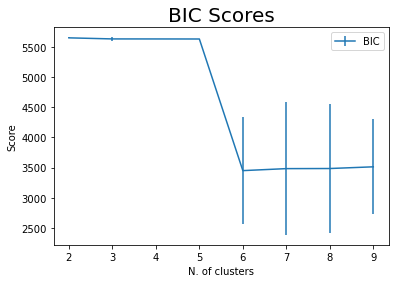

In [10]:
plt.errorbar(n_clusters,bics, yerr=bics_err, label='BIC')
plt.title("BIC Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Score")
plt.legend()

#### number of cluster is 6

## machine learning model 

In [11]:
gmm = GaussianMixture(n_components = 6) 
gmm.fit(df)

GaussianMixture(n_components=6)

In [12]:
df['cluster'] = gmm.fit_predict(df)

In [13]:
df.insert(0, 'ID', id_df)

In [14]:
df

,ID,SEX,AGE,Salary (k$),SC (%),cluster
0,1,1,19,15,39,5
1,2,1,21,15,81,5
2,3,0,20,16,6,2
3,4,0,23,16,77,3
4,5,0,31,17,40,1
...,...,...,...,...,...,...
195,196,0,35,120,79,4
196,197,0,45,126,28,0
197,198,1,32,126,74,5
198,199,1,32,137,18,5


In [15]:
df.cluster.value_counts()

5    88
1    65
0    17
3    13
4    13
2     4
Name: cluster, dtype: int64